In [99]:
#%pip install tensorflow matplotlib scikit-learn -q
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [ ]:
# on charge toutes les données
(X_train_full, y_train_full), (X_test_full, y_test_full) = cifar10.load_data()

In [ ]:
# Sélection que des deux classes  : 0 (avion) et 1 (voiture)
train_mask = (y_train_full[:, 0] == 0) | (y_train_full[:, 0] == 1)
test_mask = (y_test_full[:, 0] == 0) | (y_test_full[:, 0] == 1)

In [102]:
X_train = X_train_full[train_mask]
y_train = y_train_full[train_mask]
X_test = X_test_full[test_mask]
y_test = y_test_full[test_mask]

print(X_train.shape, y_train.shape)

(10000, 32, 32, 3) (10000, 1)


In [103]:
# Normalisation
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [104]:
# One-hot encoding des labels
y_train = to_categorical(np.where(y_train == 0, 0, 1), num_classes=2)
y_test = to_categorical(np.where(y_test == 0, 0, 1), num_classes=2)

In [105]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (10000, 32, 32, 3)
y_train shape: (10000, 2)
X_test shape: (2000, 32, 32, 3)
y_test shape: (2000, 2)


In [106]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

model = Sequential()

# Bloc 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Bloc 2
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Bloc 3
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

/Users/othmaneabderrazik/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
# Applatissement
model.add(Flatten())

# Couches denses
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # 2 neurones pour 2 classes sinon selon le nombre de classes

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 6, 6, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 272,034 (1.04 MB)

 Trainable params: 272,034 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [108]:
# Compilation
from tensorflow.keras.optimizers import Adam

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Entraînement
batch_size = 32
epochs = 10

history = model.fit(
    X_train, 
    y_train,
    batch_size=batch_size, 
    epochs=epochs,
    validation_split=0.2
)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.6234 - loss: 0.6051 - val_accuracy: 0.9010 - val_loss: 0.2737
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8846 - loss: 0.2872 - val_accuracy: 0.9110 - val_loss: 0.2170
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9164 - loss: 0.2130 - val_accuracy: 0.9330 - val_loss: 0.1752
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9280 - loss: 0.1747 - val_accuracy: 0.9485 - val_loss: 0.1462
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9481 - loss: 0.1374 - val_accuracy: 0.9560 - val_loss: 0.1115
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9523 - loss: 0.1232 - val_accuracy: 0.9430 - val_loss: 0.1455
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9671 - loss: 0.0961 - val_accuracy: 0.9660 - val_loss: 0.0914
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9639 - loss: 0.0981 - val_accu

In [109]:
# Évaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9750 - loss: 0.0619
Test accuracy: 0.9690


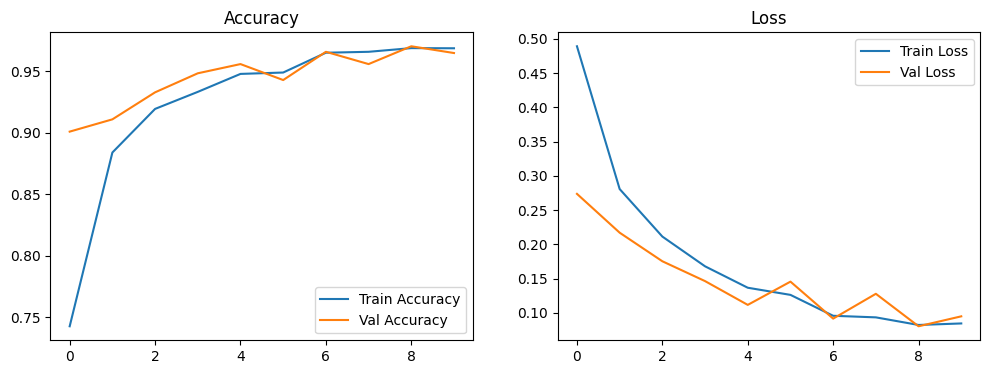

In [110]:
# Visualisation
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


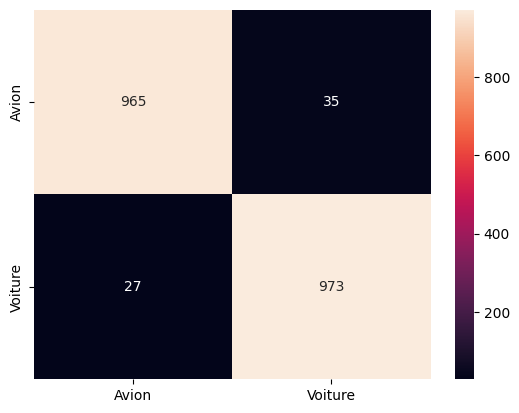

In [111]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
#%pip install seaborn -q
import seaborn as sns

y_pred = np.argmax(model.predict(X_test), axis=1)
np.save('IngenierieMath_DM_2025_Abderrazik_Othmane.npy', y_pred)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Avion', 'Voiture'], yticklabels=['Avion', 'Voiture'])
plt.show()

In [ ]:
# Je charge le fichier que je viens de créer
data = np.load('IngenierieMath_DM_2025_Abderrazik_Othmane.npy')

print("==> Vérification du fichier .npy")
print(f"Forme des données : {data.shape}")  # c exactement le nombre d'images de test
print(f"Type de données : {data.dtype}")
print(f"5 premières prédictions : {data[:5]}")

--- Vérification du fichier .npy ---
Forme des données : (2000,)
Type de données : int64
5 premières prédictions : [0 1 1 0 0]
------------------------------------
